# Computer Security
### Homework 2
#### Luis Cagigal (00211793)

### **Exercise 1**

1. Suppose a password is chosen as a concatenation of seven lower-case dictionary words. Each word is selected uniformly at random from a dictionary of size 50,000. An example of such a password is "mothercathousefivenextcrossroom". How many bits of entropy does this have?


- Since the password length (in words) is 7 and the dictionary length is 50.000, the entropy can be calculated the same way all possible permutations are calculated ($50000^7$), and using a $log_2$ since we want the bits of entropy. Like this:

In [3]:
import math

pw_word_size = 7
dict_size = 50000

entropy = math.log(dict_size ** pw_word_size, 2)

print("PW_1 Entropy Bits =", entropy)

PW_1 Entropy Bits = 109.26748332105768


2. Consider an alternative scheme where a password is chosen as a sequence of 10 random alphanumeric characters (including both lower-case and upper-case letters). An example is "dA3mG67Rrs". How many bits of entropy does this have?



- Now, the password length will be 10 (in characters), and the dictionary length is 26*2 (uppercase and lowercase alphabet letters) and the 10 numbers ([0-9]), equaling $26*2+10$. We repeat the process above to calculate the bits of entropy. Like this:

In [4]:
import math

pw_char_size = 10
alphanumeric_dict_size = (26*2) + 10

entropy = math.log(alphanumeric_dict_size ** pw_char_size, 2)

print("PW_2 Entropy Bits =", entropy)

PW_2 Entropy Bits = 59.54196310386876


3. Which password is better, the one from 1. or 2.?

- Since the first password has a higher bit entropy value, then the first password would be more secure, hence better than password 2.

### **Exercise 2**

1. Design a data verification system using hash functions. Explain the steps involved in the process.

- The first step would be to have the data we want to verify. It will be assumed that this is the case already. We will call this data D.
- The next step is to choose a framework. You could use an already existent software, but since we are tasked to design this system, we will select a programming language as baseline. In this case, Python should be good enough.
- After that, we can ask ChatGPT to generate a Python script which will read a file and perform the integrity check. Such as:

In [ ]:
import hashlib

# Function to compute the hash of a file
def compute_file_hash(file_path, hash_algorithm="sha256"):
    try:
        hasher = hashlib.new(hash_algorithm)
        with open(file_path, "rb") as file:
            while True:
                data = file.read(65536)  # Read the file in 64 KB chunks
                if not data:
                    break
                hasher.update(data)
        return hasher.hexdigest()
    except Exception as e:
        print(f"Error computing hash: {str(e)}")
        return None

# Function to check data integrity
def check_data_integrity(file_path, expected_hash):
    computed_hash = compute_file_hash(file_path)
    
    if computed_hash is not None:
        if computed_hash == expected_hash:
            print(f"Data integrity check: PASSED")
        else:
            print(f"Data integrity check: FAILED")
    else:
        print("Data integrity check: Unable to compute hash")

if __name__ == "__main__":
    file_path = "your_file.txt"  # Replace with the path to your data file
    expected_hash = "your_expected_hash"  # Replace with the expected hash value
    
    check_data_integrity(file_path, expected_hash)

- In the code, you can replace some parameters such as the hash algorithm (SHA-256 and MD5 are the most common ones today and are available in the 'hashlib' library) and the amount of bytes that would be read.
- Lastly, you would insert your data D into the filepath variable and check for the integrity of that same file. You would have to replace the hash value that is associated to the data D as well, so you can check if they match.
- The final design of the system should look like this (Fig. 1):

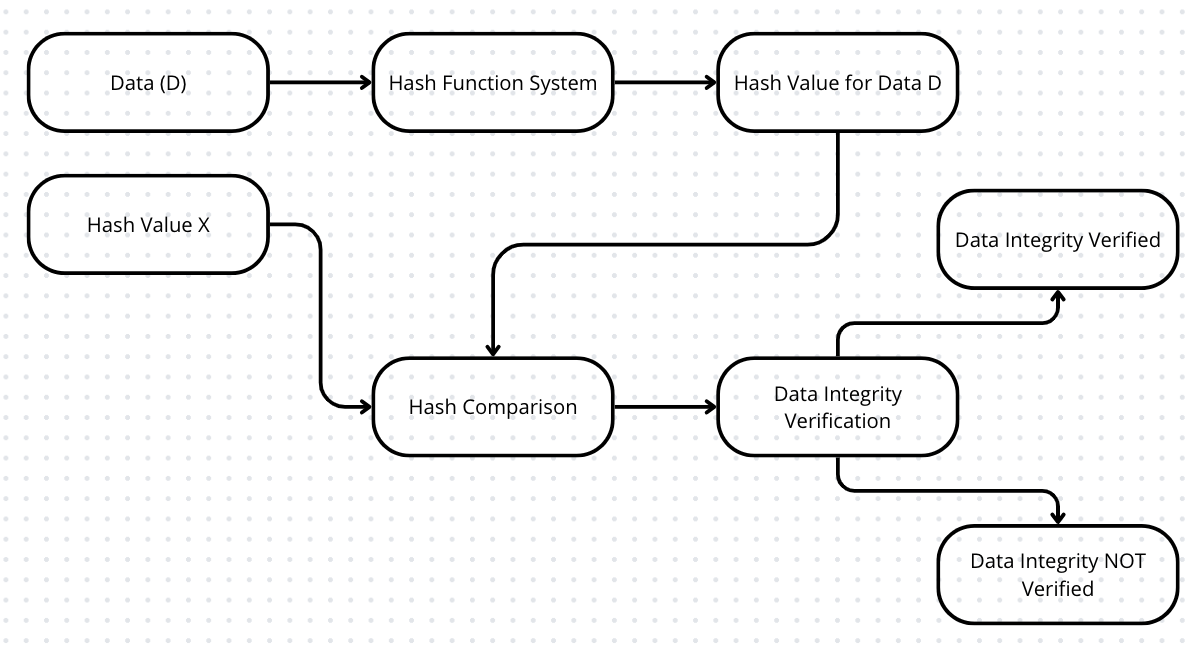

2. Discuss the advantages and disadvantages of using hash functions for data verification.

ADVANTAGES:
- Hashes are computationally efficient, which means they are easy to implement and easy to use. They are really common as well, so there are a lot of implementations out there. Because of the way hashes work, they are one of the most useful ways to check data integrity, which means a minor change would alter completely the hash value output.

DISADVANTAGES:
- It's hard to retrieve the original data once it has been passed through a hash function. Hashes don't provide confidentiality, so data encryption is very different from hashing. Lastly, hashes are suceptible to collisions, which can happen if different kinds of data return the same hash value, so randomness is key.

3. Provide an example of a real-world application where a data verification system using hash functions is used.


- In networking environments, hashes are used to check if data has been corrupted or gone missing during the transmission phase. Elements such as packets use these all the time, for example, when downloading files from the internet, so they aren't corrupted when executed or opened.

### **Exercise 3**

1. Define what a Message Authentication Code (MAC) is and how it is used in cryptography.

- It's a code that's attached into a piece of data (message) to provide integrity and authenticity. Works really well with symmetric encryption. It's used in cyptography to ensure authenticity and integrity, NOT confidentiality. The sender would attach it to the message and the receiver would verify the sender and the message.

2. Explain the process of generating and verifying a MAC.

- Assuming there is a secure channel beteween sender and receiver, the process can be described like this:
  - Since for the usage of MACs you would need to perform symmetric encryption techniques, then the key excahnges would happen first via the secure channel.
  - Performing the symmetric encryption method goes next, transforming plaintext into ciphertext.
  - Before sending the message, the generated MAC would be attached to it in the form of authentication tags. These would have a fixed length using a hash algorithm (in the case of HMAC).
    - These secret tags would be agreed upon beforehand so the comparison later works well.
  - Now, the message is sent with the MAC attached to it.
  - The receiver receives the message and the attached MAC, and checks for integrity (similar to a hash function operation). If integrity is verified, then authenticity is guaranteed and the message hasn't been altered during transmission.

3. Discuss the importance of using MACs in secure communication systems.

- Since the context is a secure communication system, then confidentiality, integrity and authenticity MUST be ensured in each message exchange. To ensure confidentiality, symmetric encryption is the method. The element that would ensure the other two components would be MACs. That's why they are fundamental in these systems. MACs will ensure the message hasn't been tampered with or damaged during transmission, and authenticity providing insight in who is sending the message.

### **Exercise 4**

Given the values of p = 17 and q = 23, generate a pair of keys for RSA.

In [17]:
p = 17
q = 23
e = 19

n = p * q

phi = (p-1) * (q-1)

d = pow(e, -1, phi)

print("PUBLIC KEY = (" + str(e) + ", " + str(n) + ")")
print("PRIVATE KEY = (" + str(d) + ", " + str(n) + ")")

PUBLIC KEY = (19, 391)
PRIVATE KEY = (315, 391)


### **Exercise 5**

1. Design a public key infrastructure (PKI) system. Explain the components and their roles in the system.

- A PKI (Public Key Infrastructure) system has the following main components:
  - Certificate Authority (CA): manages general aspects of certificate management in a PKI system. Provides authenticity. Creates and issues digital certificates with the user's public key, and signs them with the user's private key.
  - Digital Certificates: an electronic ID that ensures authenticity, enabling secure connections by verifying identities.
  - Registration Authority: is authorized by the CA to provide digital certificates by individual cases. Makes use of a certificate database (certificate store) that stores all requested certificates, revoked certificates and received certificates. 
  - Validation Authority (VA): ensures to a user if a specific certificate is valid and has not been revoked. 
  - Public and Private Keys: a public key is available to everyone, and does not need to be stored securely. Only used for encryption. Private keys are stored securely in a secure storage, they are not available to the public. They are only used for decryption so the messages that arrive encrypted with their public key, can only be decrypted with their private key.
  - Secure Storage: space in which private keys are stored in order to avoid compromising them to the public. They are usually hardware modules that manage these digital keys, which encapsulate processes like creating, deleting, editing and rotation of keys along the storage. It is designed to protect the data from non-authorized users.

- A simple design for a PKI system would look like this (Fig. 2):

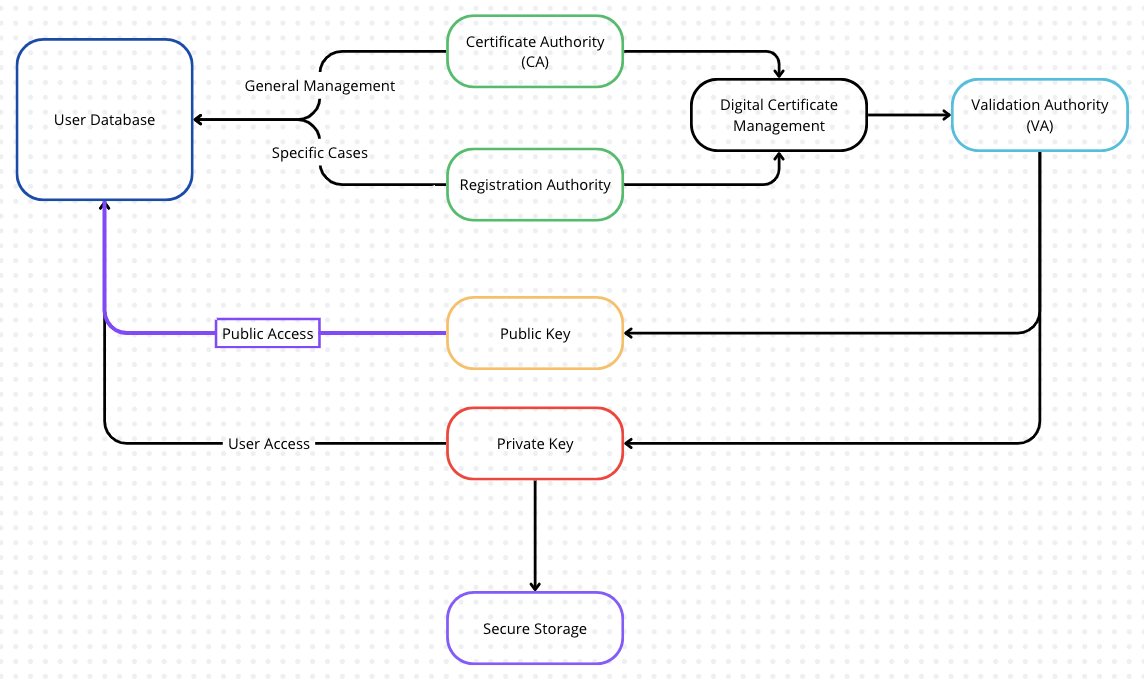

2. Discuss the advantages and challenges of implementing a PKI system.

ADVANTAGES:
- It provides a secure way of authenticating users which are connected to other users. Ensures that the client sending the data is who it claims to be, creating a Web of Trust. It also provides confidentiality by encrypting the data using a pulbic key, and using a private key to decrypt it. It's really common to rely on PKIs to create trusted channels of communication since it's mostly reliable and efficient.


CHALLENGES:
- Securing the private keys in a secure storage is probably the biggest challenge. If that secure storage is compromised, the entire infrastructure is finished, because it would mean that malicious actors can claim to be someone inside the Web of Trust, and send malicious data across the secure channels, therfore, compromising other users. Another challenge would be scaling the infrastructure. This would mean assigning a new batch of certificates that may not be authorized completely, and this would fall on the certificate authority to manage and the validation authority to validate. Another challenge would be the certificate lifespan, managing incorrectly these timelines would mean untrusted actors may have access to the secure communication channels. 

3. Provide an example of a real-world application where a PKI system is used.

- One of the most common ways a PKI infrastructure is used is in the Internet itself. Constantly, web browsers check for certificates to enable secure connections between clients and servers. This also ensures that web traffic is authenticated. The certificate authority can also be known as a trusted authority. This mechanism prevents clients from accessing untrusted servers which can cause damage to their systems, as well as servers being protected from dangerous clients. 

### **Exercise 6**

Design a system for digital signatures based on public-key cryptography. Explain the steps involved in the process and the role of each component.

- To design a system based on public key cryptography, these are the steps to follow:
  - Define the public keys and private keys for the users that conform the system.
  - Encrypt data using the public key of the receiver guaranteeing confidentiality.
  - Attach the sender's digital signature using their private key to ensure authenticity. Use hashing methods to create this digital signature.
  - Transmit the message with the digital signature attached.
  - The receiver will check for authenticity using the digital signature provided by comparing the hash values as well. If the hashes don't match, then the sender can't be verified, thus the message cannot be trusted or has been altered.

- Components and roles:
  - Sender: it will create a digital signature based on its own private key, and will attach that signature into each message sent so it can ensure authenticity and integrity. It will also encrypt the data using the receiver's public key.
  - Receiver: it will validate the digital signature sent along in the message to verify the authenticity and integrity of the data, using the hashes provided. It will also decrypt the data using its own private key.
  - Key Generator: this system will generate a pair of keys for each user, one private and one public. The public key will be available to every user. The private key will only be available for the user which it is associated to.
  - Digital Signature: passing your private key through a hash function will create a digital signature, which will be attached into every message sent to guarantee that the sender is who it claims to be.

- A simple design would look something like this (Fig. 3):

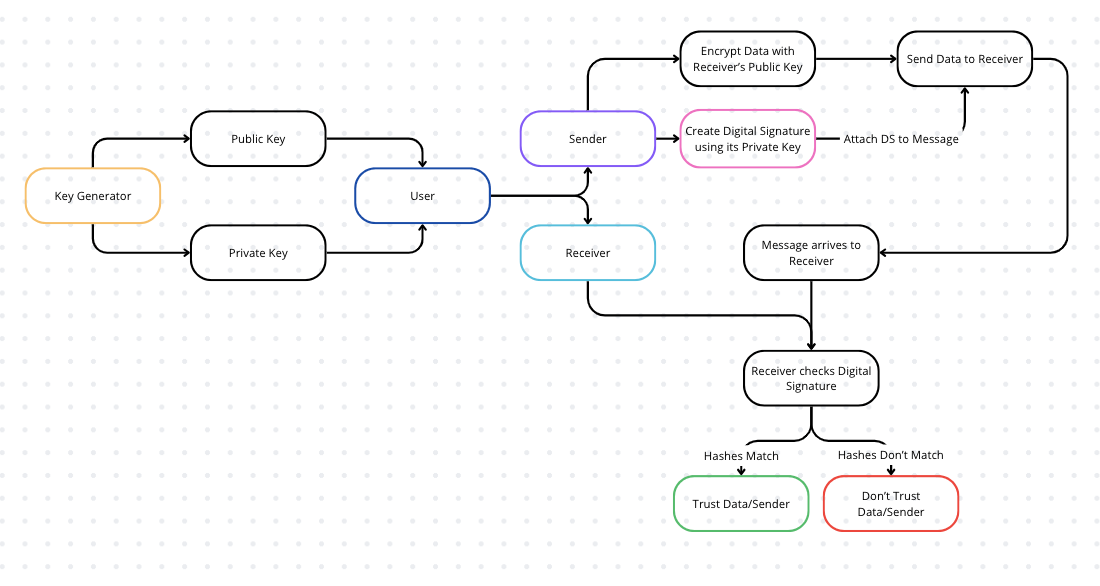